<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Standard" data-toc-modified-id="Standard-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Standard</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Phase-space" data-toc-modified-id="Phase-space-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Phase space</a></span></li><li><span><a href="#World-plot" data-toc-modified-id="World-plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>World plot</a></span></li><li><span><a href="#US-plot" data-toc-modified-id="US-plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>US plot</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#World" data-toc-modified-id="World-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>World</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Widgets" data-toc-modified-id="Widgets-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Widgets</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="#Plot-2" data-toc-modified-id="Plot-2-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Plot 2</a></span></li></ul></li><li><span><a href="#US" data-toc-modified-id="US-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>US</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Widgets" data-toc-modified-id="Widgets-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Widgets</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></li><li><span><a href="#Model-SIR" data-toc-modified-id="Model-SIR-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model SIR</a></span></li></ul></div>

In [1]:
%matplotlib inline
user = 'UF'

# Standard 

In [2]:
import datetime as dt
import pandas as pd
import sys
import csv
import geopandas as gpd
import glob
import ipywidgets #as widgets
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import socket

from matplotlib import *
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.dates import *
from numpy.random import randn
import statsmodels.api as sm

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
#init_notebook_mode(connected=True)


sns.set()

import warnings
warnings.filterwarnings('ignore')

today = dt.datetime.today().strftime("%y%m%d")
print(today)

from IPython.core.display import HTML
HTML("<style>.container { width:70% !important; }</style>")

201210


In [3]:
if user == 'UF':
    print(user)
    print(socket.gethostname().lower())

    #laptop
    if socket.gethostname().lower().startswith('osxlap01664'):#.tch.harvard.edu':
        print('Running on the laptop')
        address = "/Users/ufranca/Documents/Data/"
        addressdata = "/Users/ufranca/Documents/Data/new_datasets/"
        data_tools = "/Users/ufranca/Documents/Dropbox/projects_coding/data_tools/"
        sys.path.insert(0, '/Users/ufranca/Documents/Dropbox/projects_coding/functions')

    elif socket.gethostname().lower().startswith('urbano'):#.tch.harvard.edu':
        print('Running on the laptop')
    #     address = "/Users/urbanofranca/Documents/Datasets/"
    #     addressdata = "/Users/urbanofranca/Documents/Datasets/"
        address = "/Users/ufranca/Documents/Data/"
        addressdata = "/Users/ufranca/Documents/Data/new_datasets/"
        data_tools = "/Users/ufranca/Documents/Dropbox/projects_coding/data_tools/"
        sys.path.insert(0, '/Users/ufranca/Documents/Dropbox/projects_coding/functions')

    elif socket.gethostname().lower().startswith('vpn'):#.tch.harvard.edu':
        print('Running on the laptop')
    #     address = "/Users/urbanofranca/Documents/Datasets/"
    #     addressdata = "/Users/urbanofranca/Documents/Datasets/"
        address = "/Users/ufranca/Documents/Data/"
        addressdata = "/Users/ufranca/Documents/Data/new_datasets/"
        data_tools = "/Users/ufranca/Documents/Dropbox/projects_coding/data_tools/"
        sys.path.insert(0, '/Users/ufranca/Documents/Dropbox/projects_coding/functions')

        
    else:
        print('No known computer')

    print(address, addressdata)
    
    
    ######################################################
    ## it needs to be here to find the right dropbox -> fix this later?
    
    import functionsuf as fuf
    import hospitals as hosp
    
    external_disk = 'T'

    if (external_disk == 'T'):
        address = "/Volumes/Bell/Data/"
        addressdata = "/Volumes/Bell/Data/"
    else:
        address = address
        addressdata = addressdata 

    print('\n '+ address, '\n', addressdata, '\n', data_tools)

elif user =='MM':
    ## Here I define 
    #'addressdata', which is the folder where the data is located
    # 'data_tools', which is where the data_tools are located
    # 'address' is not used anywhere and mostly deprecated
    print(user)
    
    
else:
    print("Define the paths for `address`, `addressdata`, and `data_tools`")

UF
urbanos-macbook-pro.local
Running on the laptop
/Users/ufranca/Documents/Data/ /Users/ufranca/Documents/Data/new_datasets/
Running on the laptop
Running on the laptop

 /Volumes/Bell/Data/ 
 /Volumes/Bell/Data/ 
 /Users/ufranca/Documents/Dropbox/projects_coding/data_tools/


# Date
Date of data downloaded from JHU

In [4]:
date2 = '1210'

# Functions

## Phase space

In [5]:
def create_phase_space(df, col="Country/Region", ncases=10, time_window=1):
    # melt the dates in the dataset
    df_melted = df.melt(id_vars=[col], 
                        var_name="Date", 
                        value_name="Confirmed")

    # changing column types
    df_melted['Confirmed'] = df_melted['Confirmed'].astype(float)
    df_melted['DateDT'] = pd.to_datetime(df_melted['Date'])
    
    
    # sorting by col & date
    df_melted = df_melted.sort_values([col, 'DateDT'])
    
    # adding dates 
    df_melted['Days'] = df_melted.index
    
    #Daily growth
    df_melted['DailyGrowth'] = df_melted['Confirmed'].diff()
    #df_melted['DotDailyGrowth'] = df_melted['DailyGrowth'].diff()
    
    max_daily_growth= df_melted.groupby(col)['DailyGrowth'].nlargest(7).reset_index()
    max_daily_growth= max_daily_growth.groupby([col])['DailyGrowth'].mean().reset_index()
    #print(max_daily_growth)
    
    max_daily_growth.columns=[col, 'MaxDailyGrowth']

    df_melted = df_melted.merge(max_daily_growth, on=col, how='outer')
    
    
    
    # y-axis
    df_melted['DailyGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).sum()/ df_melted['Confirmed'], 1)

    # x-axis
    df_melted['MeanGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).mean()/df_melted['MaxDailyGrowth'], 1)

    
#     df_melted['MeanGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).mean()/df_melted['MaxDailyGrowth'], 1)
#     df_melted['DailyGrowth_'+str(time_window)+'d'] = df_melted['MeanGrowth_'+str(time_window)+'d']    
#     df_melted['MeanGrowth_'+str(time_window)+'d'] = df_melted['MeanGrowth_'+str(time_window)+'d'].diff().rolling(time_window).sum()
    
    # just cleaning values when transitioning from one country to another
    df_melted['DailyGrowth_'+str(time_window)+'d'] = np.where(df_melted['DailyGrowth_'+str(time_window)+'d'] >= 0, 
                                                              df_melted['DailyGrowth_'+str(time_window)+'d'], 
                                                              0)
    df_melted['MeanGrowth_'+str(time_window)+'d'] = np.where(df_melted['MeanGrowth_'+str(time_window)+'d'] >= 0, 
                                                             df_melted['MeanGrowth_'+str(time_window)+'d'], 
                                                             0)
    
    # selecting minimum number of cases
    df_melted = df_melted[df_melted['Confirmed'] >= ncases]
    
    
    return df_melted
    

In [6]:
def create_phase_space_2(df, col="Country/Region", ncases=10, time_window=1):
    # melt the dates in the dataset
    df_melted = df.melt(id_vars=[col], 
                        var_name="Date", 
                        value_name="Confirmed")

    # changing column types
    df_melted['Confirmed'] = df_melted['Confirmed'].astype(float)
    df_melted['DateDT'] = pd.to_datetime(df_melted['Date'])
    
    
    # sorting by col & date
    df_melted = df_melted.sort_values([col, 'DateDT'])
    
    # adding dates 
    df_melted['Days'] = df_melted.index
    
    #Daily growth
    df_melted['DailyGrowth'] = df_melted['Confirmed'].diff()
    #df_melted['DotDailyGrowth'] = df_melted['DailyGrowth'].diff()
    
    max_daily_growth= df_melted.groupby(col)['DailyGrowth'].nlargest(7).reset_index()
    max_daily_growth= max_daily_growth.groupby([col])['DailyGrowth'].mean().reset_index()
    #print(max_daily_growth)
    
    max_daily_growth.columns=[col, 'MaxDailyGrowth']

    df_melted = df_melted.merge(max_daily_growth, on=col, how='outer')
    
    
    
    # y-axis
    df_melted['DailyGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).sum()/ df_melted['Confirmed'], 1)

    # x-axis
#    df_melted['MeanGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).mean()/df_melted['MaxDailyGrowth'], 1)

    
    df_melted['MeanGrowth_'+str(time_window)+'d'] = round(100*df_melted['DailyGrowth'].rolling(time_window).mean()/df_melted['MaxDailyGrowth'], 1)
    df_melted['DailyGrowth_'+str(time_window)+'d'] = df_melted['MeanGrowth_'+str(time_window)+'d']    
    df_melted['MeanGrowth_'+str(time_window)+'d'] = df_melted['MeanGrowth_'+str(time_window)+'d'].diff().rolling(time_window).sum()
    
    # just cleaning values when transitioning from one country to another
    df_melted['DailyGrowth_'+str(time_window)+'d'] = np.where(df_melted['DailyGrowth_'+str(time_window)+'d'] >= 0, 
                                                              df_melted['DailyGrowth_'+str(time_window)+'d'], 
                                                              0)
#     df_melted['MeanGrowth_'+str(time_window)+'d'] = np.where(df_melted['MeanGrowth_'+str(time_window)+'d'] >= 0, 
#                                                              df_melted['MeanGrowth_'+str(time_window)+'d'], 
#                                                              0)
    
    # selecting minimum number of cases
    df_melted = df_melted[df_melted['Confirmed'] >= ncases]
    
    
    return df_melted

## World plot

In [7]:
def plot_phase_space_world(df, title='Deaths', time_window=1, n_cases= 50, country=['All Countries']):
        
    if country == ('All Countries',):
        print('All Countries')
        
        #### ADD SUM FOR COUNTRIES
        
        
    else:
        df = df[df['Country/Region'].isin(country)]

        
    df_2 = create_phase_space(df, col='Country/Region', ncases=n_cases, time_window=time_window)
    
    
    print(df_2.columns)
    
    #df_2['Size'] = df_2['Confirmed']*2
    
    fig = px.scatter(df_2, 
                  x='MeanGrowth_'+str(time_window)+'d', 
                  y='DailyGrowth_'+str(time_window)+'d', 
                  size='Confirmed',
                  color='Country/Region', 
                  title=title+" - World",
                  hover_data={'Country/Region',
                              'Confirmed',
                              'Date',
                              'DailyGrowth'
                             }, #What will be shown in the hover box (besides location)
                  labels={'MeanGrowth_'+str(time_window)+'d':'Mean growth over '+str(time_window)+'d compared to max growth ',
                          'DailyGrowth_'+str(time_window)+'d': '% cases from last '+str(time_window)+'d ',
                          'Country/Region':'Country ', 
                          'Confirmed':title, 
                          'DailyGrowth': title+' today ' 
                         })


    fig.update_traces(mode='lines+markers')
    
    fig.update_yaxes(title_text='Percentage of Total occuring in the last '+str(time_window)+' days (%)',
                     rangemode="tozero")
    
    fig.update_xaxes(title_text='Mean Daily Growth over '+str(time_window)+' previous days compared to Max Daily Growth (%)',
                     rangemode="tozero")

    fig.update_layout(hovermode='closest')
    
    ## Uncomment to see on a separate webpage page at the folder "webpage"
    plot(fig, filename="webpage/phase_space_world_"+title.lower()+".html")
    

    fig.show()
    
    return df_2

In [8]:
def plot_phase_space_world_several(df, title='Deaths', time_window=1, n_cases= 50, country=['All Countries'], rows=1, cols=2):
        
    if country == ('All Countries',):
        print('All Countries')
        
        #### ADD SUM FOR COUNTRIES
        
        
    else:
        df = df[df['Country/Region'].isin(country)]

        
    df_2 = create_phase_space(df, col='Country/Region', ncases=n_cases, time_window=time_window)
    
    
    df_2['Text'] = ('Country/Region: '+df_2['Country/Region'].astype(str)+'<br> Date: '+df_2['Date'].astype(str)+'<br> '
                    +title+': '+df_2['Confirmed'].astype(str).apply(fuf.cleandotzero)+'<br>'+title+' today: '+df_2['DailyGrowth'].astype(str).apply(fuf.cleandotzero))
    
    print(df_2.columns)
    
        
    #print(df_2['DailyGrowth'].describe())
    
    df_2['DailyGrowth'] = np.where(df_2['DailyGrowth'] < 0, 0, df_2['DailyGrowth'])
    df_2['WeekDailyGrowth'] = df_2['DailyGrowth'].rolling(7).mean().replace(np.nan, 0)
    #print(df_2['DailyGrowth'].describe())
    
    #df_2['Size'] = df_2['Confirmed']*2
    
    #size of markers
    if title=='Confirmed Cases':
        f=1/10
    else:
        f=1/2
    
    fig = make_subplots(rows=rows, cols=cols,
                        x_title='Mean Daily Growth over '+str(time_window)+' previous days compared to Max Daily Growth (%)',
                        y_title='Percentage of Total occuring in the last '+str(time_window)+' days (%)',
                       subplot_titles=tuple(sorted(list(df['Country/Region'].unique())))
                       )
    
    i=1
    j=1
    for country in sorted(list(df['Country/Region'].unique())):
    
        df_3 = df_2[df_2['Country/Region'] == country]
        fig.add_trace(go.Scatter(x=list(df_3['MeanGrowth_'+str(time_window)+'d']), 
                                  y=list(df_3['DailyGrowth_'+str(time_window)+'d']), 
                                 text=list(df_3['Text']),
                                 name= country,
                                 mode='lines+markers',
                                 marker=dict(size=list(f*df_3['WeekDailyGrowth'].apply(lambda x: np.sqrt(x))),
                                            #color='Red', #set color equal to a variable
                                            #colorscale='Viridis'
                                            ),
#                                   size=list(df_2['Confirmed']),
#                                   color=list(df_2['Country/Region']), 
#                                   title=title+" - World",
#                                   hover_data={'Country/Region',
#                                               'Confirmed',
#                                               'Date',
#                                               'DailyGrowth'
#                                              }, #What will be shown in the hover box (besides location)
#                                   labels={'MeanGrowth_'+str(time_window)+'d':'Mean growth over '+str(time_window)+'d compared to max growth ',
#                                           'DailyGrowth_'+str(time_window)+'d': '% cases from last '+str(time_window)+'d ',
#                                           'Country/Region':'Country ', 
#                                           'Confirmed':title, 
#                                           'DailyGrowth': title+' today '}
                                ),
                     row=i, col=j)
        j+=1
        if j > cols:
            i +=1
            j = 1



    fig.update_yaxes(range=(0,100))
    
    fig.update_xaxes(range=(0,100))

    
    fig.update_layout(height=2400, width=1200,
                  title_text=title,
                      showlegend=False
                     )
    

    ## Uncomment to see on a separate webpage page at the folder "webpage"
    plot(fig, filename="webpage/phase_space_world_several_"+title.lower()+".html")
    
    
    fig.show()
    
    return df_2

## US plot

In [9]:
def plot_phase_space_US(df, title='Deaths', time_window=10, n_cases= 50, state=['All States']):
        
    if state == ('All States',):
        print('All states')
        
        #### ADD SUM FOR STATES

        
        
    else:
        df = df[df['Province_State'].isin(state)]

        
    df_2 = create_phase_space(df, col='Province_State', ncases=n_cases, time_window=time_window)
    
    
    #df_2 = df_2[df_2['MeanGrowth_'+str(time_window)+'d'] > 0]
    
    fig = px.scatter(df_2, 
                  x='MeanGrowth_'+str(time_window)+'d', 
                  y='DailyGrowth_'+str(time_window)+'d', 
                  size='Confirmed',
                  color='Province_State', 
                  #animation_frame='Date',
                  title=title+" - US",
                  hover_data={'Province_State',
                              'Confirmed', 
                              'Date',
                              'DailyGrowth'
                             }, #What will be shown in the hover box (besides location) 
                  labels={'MeanGrowth_'+str(time_window)+'d':'Mean growth over '+str(time_window)+'d compared to max growth ',
                          'DailyGrowth_'+str(time_window)+'d': '% cases from last '+str(time_window)+'d ',
                          'Province_State':'State ', 
                          'Confirmed':title,
                          'DailyGrowth': title+' today ' ,
                         }
                    
                    )

    fig.update_traces(mode='lines+markers')
    
    fig.update_yaxes(title_text='Percentage of Total occuring in the last '+str(time_window)+' days (%)',
                     rangemode="tozero")
    
    fig.update_xaxes(title_text='Mean Daily Growth over '+str(time_window)+' previous days compared to Max Daily Growth (%)', 
                     rangemode="tozero")
    
    
    #fig["layout"].pop("updatemenus")# optional, drop animation buttons
    
    # Uncomment to see on a separate webpage page at the folder "webpage"
    plot(fig, filename="webpage/phase_space_us_"+title.lower()+".html")
    
    fig.show()
    
    return df_2

In [10]:
def plot_phase_space_US_several(df, title='Deaths', time_window=1, n_cases= 50, state=['All States'], rows=1, cols=2):
        
    if state == ('All States',):
        print('All states')
        
        #### ADD SUM FOR STATES

        
        
    else:
        df = df[df['Province_State'].isin(state)]


        
    df_2 = create_phase_space(df, col='Province_State', ncases=n_cases, time_window=time_window)
    
    
    df_2['Text'] = ('Province_State: '+df_2['Province_State'].astype(str)+'<br> Date: '+df_2['Date'].astype(str)+'<br> '
                    +title+': '+df_2['Confirmed'].astype(str).apply(fuf.cleandotzero)+'<br>'+title+' today: '+df_2['DailyGrowth'].astype(str).apply(fuf.cleandotzero))
    
    print(df_2.columns)
    
    df_2['DailyGrowth'] = np.where(df_2['DailyGrowth'] < 0, 0, df_2['DailyGrowth'])
    df_2['WeekDailyGrowth'] = df_2['DailyGrowth'].rolling(7).mean().replace(np.nan, 0)
    #print(df_2['DailyGrowth'].describe())
    
    
    #df_2['Size'] = df_2['Confirmed']*2
    
    #size of markers
    if title=='Confirmed Cases':
        f=1/5
    else:
        f=1
    
    fig = make_subplots(rows=rows, cols=cols,
                        x_title='Mean Daily Growth over '+str(time_window)+' previous days compared to Max Daily Growth (%)',
                        y_title='Percentage of Total occuring in the last '+str(time_window)+' days (%)',
                       subplot_titles=tuple(sorted(list(df['Province_State'].unique())))
                       )
    
    i=1
    j=1
    for country in sorted(list(df['Province_State'].unique())):
    
        df_3 = df_2[df_2['Province_State'] == country]
        fig.add_trace(go.Scatter(x=list(df_3['MeanGrowth_'+str(time_window)+'d']), 
                                  y=list(df_3['DailyGrowth_'+str(time_window)+'d']), 
                                 text=list(df_3['Text']),
                                 name= country,
                                 mode='lines+markers',
                                 marker=dict(size=list(f*df_3['WeekDailyGrowth'].apply(lambda x: np.sqrt(x))),
                                            #color='Red', #set color equal to a variable
                                            #colorscale='Viridis'
                                            ),
#                                   size=list(df_2['Confirmed']),
#                                   color=list(df_2['Country/Region']), 
#                                   title=title+" - World",
#                                   hover_data={'Country/Region',
#                                               'Confirmed',
#                                               'Date',
#                                               'DailyGrowth'
#                                              }, #What will be shown in the hover box (besides location)
#                                   labels={'MeanGrowth_'+str(time_window)+'d':'Mean growth over '+str(time_window)+'d compared to max growth ',
#                                           'DailyGrowth_'+str(time_window)+'d': '% cases from last '+str(time_window)+'d ',
#                                           'Country/Region':'Country ', 
#                                           'Confirmed':title, 
#                                           'DailyGrowth': title+' today '}
                                ),
                     row=i, col=j)
        j+=1
        if j > cols:
            i +=1
            j = 1



    fig.update_yaxes(range=(0,100))
    
    fig.update_xaxes(range=(0,100))

    
    fig.update_layout(height=2400, width=1200,
                  title_text=title,
                      showlegend=False
                     )
    

    ## Uncomment to see on a separate webpage page at the folder "webpage"
    plot(fig, filename="webpage/phase_space_us_several_"+title.lower()+".html")
    
    
    fig.show()
    
    return df_2

# Data

## World

### Reading data

In [11]:
daily_cases_global_all = pd.read_csv(date2+'_COVID-19-master_JHU/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
                                 dtype=object)
daily_cases_global = daily_cases_global_all.drop(columns =['Province/State', 'Lat', 'Long'])

daily_deaths_global_all = pd.read_csv(date2+'_COVID-19-master_JHU/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 
                                 dtype=object)
daily_deaths_global = daily_deaths_global_all.drop(columns =['Province/State', 'Lat', 'Long'])


daily_cases_global[daily_cases_global.columns[1:]] = daily_cases_global[daily_cases_global.columns[1:]].astype(float)
daily_deaths_global[daily_deaths_global.columns[1:]] = daily_deaths_global[daily_deaths_global.columns[1:]].astype(float)

daily_cases_global = daily_cases_global.groupby('Country/Region').sum().reset_index()
daily_deaths_global = daily_deaths_global.groupby('Country/Region').sum().reset_index()

In [12]:
min_w = widgets.FloatSlider(
    value=5000,
    min=0,
    max=100000,
    step=1000,
    description='Minimum Number:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(min_w)


FloatSlider(value=5000.0, continuous_update=False, description='Minimum Number:', max=100000.0, readout_format…

In [13]:
# Select minimum number countries
df_cts = daily_cases_global[['Country/Region',daily_cases_global.columns[-1]]]
df_cts = df_cts[df_cts[daily_cases_global.columns[-1]].astype(float) > min_w.value]

list_countries = ['All Countries']
list_countries.extend(sorted(list(df_cts['Country/Region'].unique())))

### Widgets

In [14]:
style = {'description_width': 'initial'}

ct_w = widgets.SelectMultiple(
    description='Country:',
    options=list_countries,
    value=list_countries,
    layout=Layout(width='20%', height='100px')
)
display(ct_w)

cases_w = widgets.ToggleButtons(
    description='Option:',
    options=['Confirmed Cases', 'Deaths'],
)
display(cases_w)

min_w = widgets.FloatSlider(
    value=50,
    min=0,
    max=1000,
    step=10,
    description='Minimum Number:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(min_w)

tw_w = widgets.FloatSlider(
    value=14,
    min=1,
    max=21,
    step=1,
    description='Days Avg:',
    disabled=False,
    #continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(tw_w)



SelectMultiple(description='Country:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…

ToggleButtons(description='Option:', options=('Confirmed Cases', 'Deaths'), value='Confirmed Cases')

FloatSlider(value=50.0, continuous_update=False, description='Minimum Number:', max=1000.0, readout_format='.0…

FloatSlider(value=14.0, description='Days Avg:', max=21.0, min=1.0, readout_format='.0f', step=1.0)

### Plot

In [29]:
list_top_16_countries = daily_cases_global.sort_values(daily_cases_global.columns[-2], ascending=False).reset_index()['Country/Region'][:16].to_list()    
ct_w.value = list_top_16_countries


if cases_w.value == 'Confirmed Cases':

    daily_cases_global_2 = plot_phase_space_world(daily_cases_global, 
                                           title = cases_w.value, time_window=int(tw_w.value), 
                                           n_cases = min_w.value, country=ct_w.value)
elif cases_w.value == 'Deaths':
    daily_deaths_global_2 = plot_phase_space_world(daily_deaths_global, 
                                            title = cases_w.value, time_window=int(tw_w.value), 
                                            n_cases = min_w.value, country=ct_w.value)
else:
    print('ERROR in dataframe')   
    


Index(['Country/Region', 'Date', 'Confirmed', 'DateDT', 'Days', 'DailyGrowth',
       'MaxDailyGrowth', 'DailyGrowth_14d', 'MeanGrowth_14d'],
      dtype='object')


### Plot 2

In [30]:
nc= 21
rows=7
cols=3
list_top_16_countries = daily_cases_global.sort_values(daily_cases_global.columns[-2], ascending=False).reset_index()['Country/Region'][:nc].to_list()    
ct_w.value = list_top_16_countries

if cases_w.value == 'Confirmed Cases':

    daily_cases_global_2 = plot_phase_space_world_several(daily_cases_global, 
                                           title = cases_w.value, time_window=int(tw_w.value), 
                                           n_cases = min_w.value, country=ct_w.value, rows=rows, cols=cols)
elif cases_w.value == 'Deaths':
    daily_deaths_global_2 = plot_phase_space_world_several(daily_deaths_global, 
                                            title = cases_w.value, time_window=int(tw_w.value), 
                                            n_cases = min_w.value, country=ct_w.value,rows=rows, cols=cols)
else:
    print('ERROR in dataframe')   

Index(['Country/Region', 'Date', 'Confirmed', 'DateDT', 'Days', 'DailyGrowth',
       'MaxDailyGrowth', 'DailyGrowth_14d', 'MeanGrowth_14d', 'Text'],
      dtype='object')


## US

### Reading data

In [17]:
daily_cases_US = pd.read_csv(date2+'_COVID-19-master_JHU/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv', 
                                 dtype=object)
# daily_cases_global = daily_cases_global_all.drop(columns =['Province/State', 'Lat', 'Long'])
daily_cases_US = daily_cases_US[~daily_cases_US['Province_State'].isin(['Diamond Princess', 'Grand Princess'])]

daily_deaths_US = pd.read_csv(date2+'_COVID-19-master_JHU/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv', 
                                 dtype=object)
# daily_deaths_global = daily_deaths_global_all.drop(columns =['Province/State', 'Lat', 'Long'])
daily_deaths_US = daily_deaths_US[~daily_deaths_US['Province_State'].isin(['Diamond Princess', 'Grand Princess'])]

daily_cases_US[daily_cases_US.columns[11:]] = daily_cases_US[daily_cases_US.columns[11:]].astype(float)
daily_deaths_US[daily_deaths_US.columns[11:]] = daily_deaths_US[daily_deaths_US.columns[11:]].astype(float)

daily_cases_US = daily_cases_US.groupby('Province_State')[daily_cases_US.columns[11:]].sum().reset_index()
daily_deaths_US = daily_deaths_US.groupby('Province_State')[daily_deaths_US.columns[11:]].sum().reset_index()

In [18]:
min_us = widgets.FloatSlider(
    value=1000,
    min=0,
    max=100000,
    step=1000,
    description='Minimum Number:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(min_us)

FloatSlider(value=1000.0, continuous_update=False, description='Minimum Number:', max=100000.0, readout_format…

In [19]:
# Select minimum number states
df_sts = daily_cases_US[['Province_State',daily_cases_US.columns[-1]]]
df_sts = df_sts[df_sts[daily_cases_US.columns[-1]].astype(float) > min_us.value]

list_states = ['All States']
list_states.extend(sorted(list(daily_cases_US['Province_State'].unique())))

### Widgets

In [20]:
style = {'description_width': 'initial'}

st_us = widgets.SelectMultiple(
    description='State:',
    options=list_states,
    value=list_states,
    layout=Layout(width='20%', height='100px')
)
display(st_us)

cases_us = widgets.ToggleButtons(
    description='Option:',
    options=['Confirmed Cases', 'Deaths'],
)
display(cases_us)

min_us = widgets.FloatSlider(
    value=20,
    min=0,
    max=1000,
    step=50,
    description='Minimum Number:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(min_us)

tw_us = widgets.FloatSlider(
    value=14,
    min=1,
    max=21,
    step=1,
    description='Days Avg:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
display(tw_us)

SelectMultiple(description='State:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …

ToggleButtons(description='Option:', options=('Confirmed Cases', 'Deaths'), value='Confirmed Cases')

FloatSlider(value=20.0, continuous_update=False, description='Minimum Number:', max=1000.0, readout_format='.0…

FloatSlider(value=14.0, continuous_update=False, description='Days Avg:', max=21.0, min=1.0, readout_format='.…

In [31]:
cases_w.value

'Deaths'

### Plot

In [32]:
list_top_15_countries = daily_cases_US.sort_values(daily_cases_US.columns[-2], ascending=False).reset_index()['Province_State'][:15].to_list()    
st_us.value = list_top_15_countries

if cases_us.value == 'Confirmed Cases':
    daily_cases_US_2 = plot_phase_space_US(daily_cases_US, 
                                           title = cases_us.value, time_window=int(tw_us.value), 
                                           n_cases = min_us.value, state=st_us.value)
elif cases_us.value == 'Deaths':
    daily_deaths_US_2 = plot_phase_space_US(daily_deaths_US.drop(columns='Population'), 
                                            title = cases_us.value, time_window=int(tw_us.value), 
                                            n_cases = min_us.value, state=st_us.value)
else:
    print('ERROR in dataframe')   
    


In [33]:
cases_w.value

'Deaths'

In [34]:
nc= 50
rows=10
cols=5
list_top_24_states = daily_cases_US.sort_values(daily_cases_US.columns[-2], ascending=False).reset_index()['Province_State'][:nc].to_list()    
st_us.value = list_top_24_states

if cases_us.value == 'Confirmed Cases':

    daily_cases_US_2 = plot_phase_space_US_several(daily_cases_US, 
                                           title = cases_us.value, time_window=int(tw_us.value), 
                                           n_cases = min_us.value, state=st_us.value, rows=rows, cols=cols)
elif cases_us.value == 'Deaths':
    daily_deaths_US_2 = plot_phase_space_US_several(daily_deaths_US.drop(columns='Population'), 
                                            title = cases_us.value, time_window=int(tw_us.value), 
                                            n_cases = min_us.value, state=st_us.value,rows=rows, cols=cols)
else:
    print('ERROR in dataframe') 

Index(['Province_State', 'Date', 'Confirmed', 'DateDT', 'Days', 'DailyGrowth',
       'MaxDailyGrowth', 'DailyGrowth_14d', 'MeanGrowth_14d', 'Text'],
      dtype='object')


In [25]:
# if cases_us.value == 'Confirmed Cases':
#     df_test = daily_cases_US_2
# elif cases_us.value == 'Deaths':
#     df_test = daily_deaths_US_2

# fig, ax = plt.subplots(figsize=(10,10))


# sns.lineplot(x="Days", y="DailyGrowth",
#              hue="Province_State", 
#              data=df_test)

# #ax.set_yscale('log')

# Model SIR

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [27]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

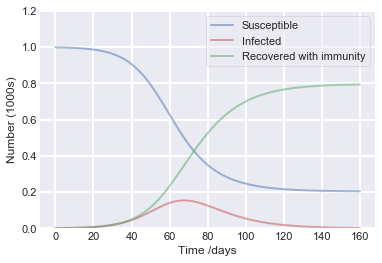

In [28]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()